In [1]:
!pip install pandas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

1**.Loading and Understanding the dataset**

In [5]:
df_loan = pd.read_csv("/content/loan.csv")

<ipython-input-5-0536c765d2bb>:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("/content/loan.csv")


In [6]:
df_loan.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33093 entries, 0 to 33092
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           33093 non-null  int64  
 1   member_id                    33093 non-null  int64  
 2   loan_amnt                    33093 non-null  float64
 3   funded_amnt                  33093 non-null  float64
 4   funded_amnt_inv              33093 non-null  float64
 5   term                         33093 non-null  object 
 6   int_rate                     33093 non-null  float64
 7   installment                  33093 non-null  float64
 8   grade                        33093 non-null  object 
 9   sub_grade                    33093 non-null  object 
 10  emp_title                    31008 non-null  object 
 11  emp_length                   32015 non-null  object 
 12  home_ownership               33093 non-null  object 
 13  annual_inc      

**2. Removing Irrelevant coloumn**

In [9]:
df_loan.drop(df_loan.columns.difference(['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership',
                                         'annual_inc','verification_status','loan_status','purpose',]), axis=1, inplace=True)

In [11]:
df_loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1078
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dtype: int64

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33093 entries, 0 to 33092
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            33093 non-null  float64
 1   term                 33093 non-null  object 
 2   int_rate             33093 non-null  float64
 3   installment          33093 non-null  float64
 4   grade                33093 non-null  object 
 5   emp_length           32015 non-null  object 
 6   home_ownership       33093 non-null  object 
 7   annual_inc           33093 non-null  float64
 8   verification_status  33093 non-null  object 
 9   loan_status          33093 non-null  object 
 10  purpose              33093 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.8+ MB


In [13]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33093 entries, 0 to 33092
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            33093 non-null  float64
 1   term                 33093 non-null  object 
 2   int_rate             33093 non-null  float64
 3   installment          33093 non-null  float64
 4   grade                33093 non-null  object 
 5   emp_length           32015 non-null  object 
 6   home_ownership       33093 non-null  object 
 7   annual_inc           33093 non-null  float64
 8   verification_status  33093 non-null  object 
 9   loan_status          33093 non-null  object 
 10  purpose              33093 non-null  object 
dtypes: float64(4), object(7)
memory usage: 2.8+ MB


In [14]:
df_loan.annual_inc = df_loan.annual_inc.fillna(0)
df_loan.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1078
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dtype: int64

to eliminate null values, the annual income column is filled with the value 0

**3. Create label Coloumn : Description about loan status**

In this column, the value 0 will be filled with the correct conditions: 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current'


Meanwhile, the value of 1 will be filled with
incorrect conditions: 'Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'

In [15]:
# binary classification
label_categories = [
    (0, ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid', 'Current']),
    (1, ['Late (31-120 days)', 'Late (16-30 days)', 'In Grace Period',
         'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off'])
]

# function to apply the transformation
def classify_label(text):
    for category, matches in label_categories:
        if any(match in text for match in matches):
            return category
    return None

df_loan.loc[:, 'label'] = df_loan['loan_status'].apply(classify_label)
df_loan = df_loan.drop('loan_status', axis=1)

In [16]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0


def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

df_loan["grade"] = df_loan["grade"].apply(SC_LabelEncoder1)
df_loan["emp_length"] = df_loan["emp_length"].apply(SC_LabelEncoder2)
df_loan["home_ownership"] = df_loan["home_ownership"].apply(SC_LabelEncoder3)

In [17]:
df_loan.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,credit_card,0
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,car,1
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,small_business,0
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,other,0
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,other,0
5,5000.0,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,wedding,0
6,7000.0,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,debt_consolidation,0
7,3000.0,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,car,0
8,5600.0,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,small_business,1
9,5375.0,60 months,12.69,121.45,4,1,1,15000.0,Verified,other,1


In [18]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33093 entries, 0 to 33092
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            33093 non-null  float64
 1   term                 33093 non-null  object 
 2   int_rate             33093 non-null  float64
 3   installment          33093 non-null  float64
 4   grade                33093 non-null  int64  
 5   emp_length           33093 non-null  int64  
 6   home_ownership       33093 non-null  int64  
 7   annual_inc           33093 non-null  float64
 8   verification_status  33093 non-null  object 
 9   purpose              33093 non-null  object 
 10  label                33093 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 2.8+ MB


**4. Exploratory Data Analysis**

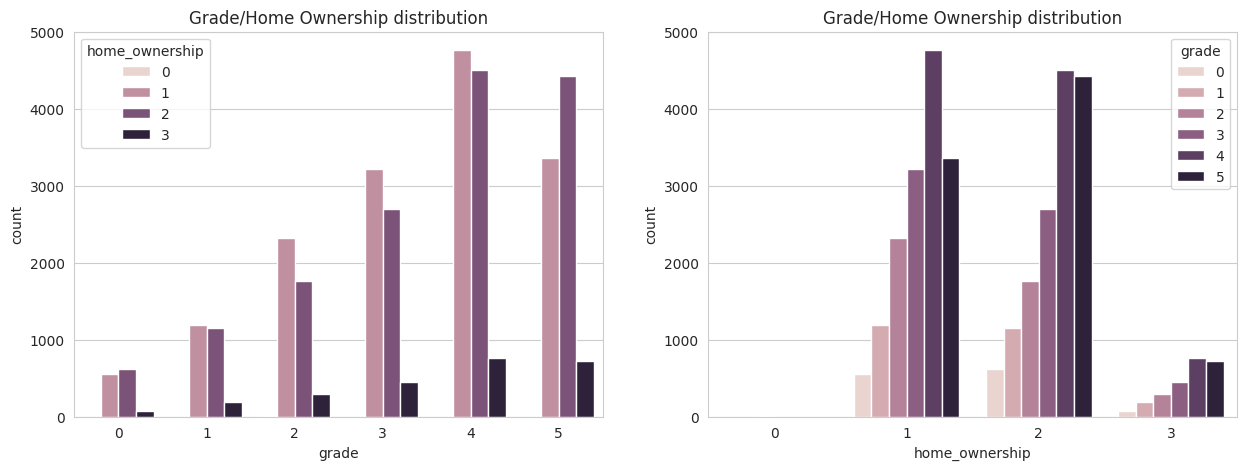

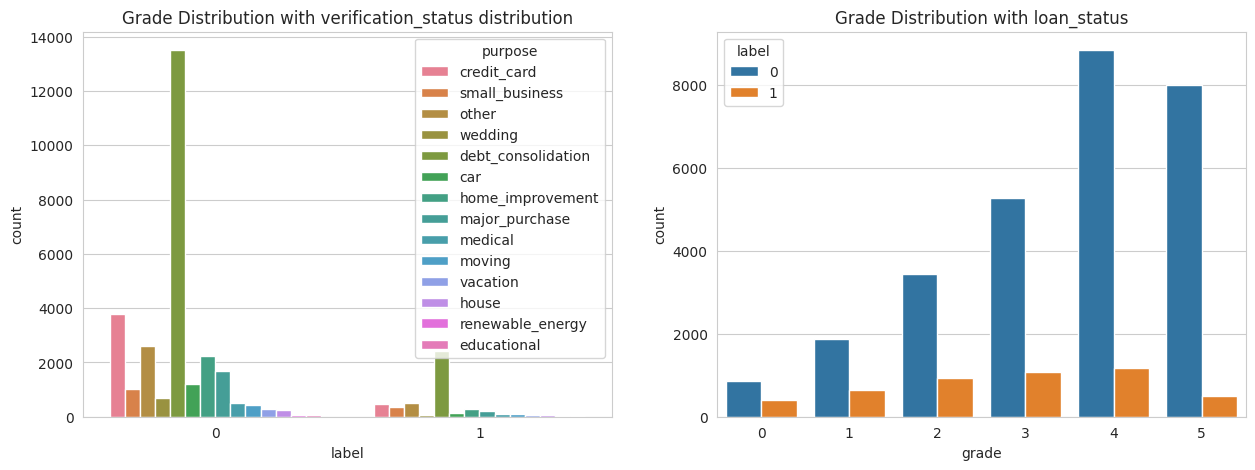

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df_loan, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df_loan, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

Analysis :
1. The number of Borrowers with high grade will be small compared to low grade
2. Most money borrowers' goals from labels 0 and 1 are debt consolidation
3.The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3


Text(0.5, 1.0, 'Loan amounts grouped by purpose')

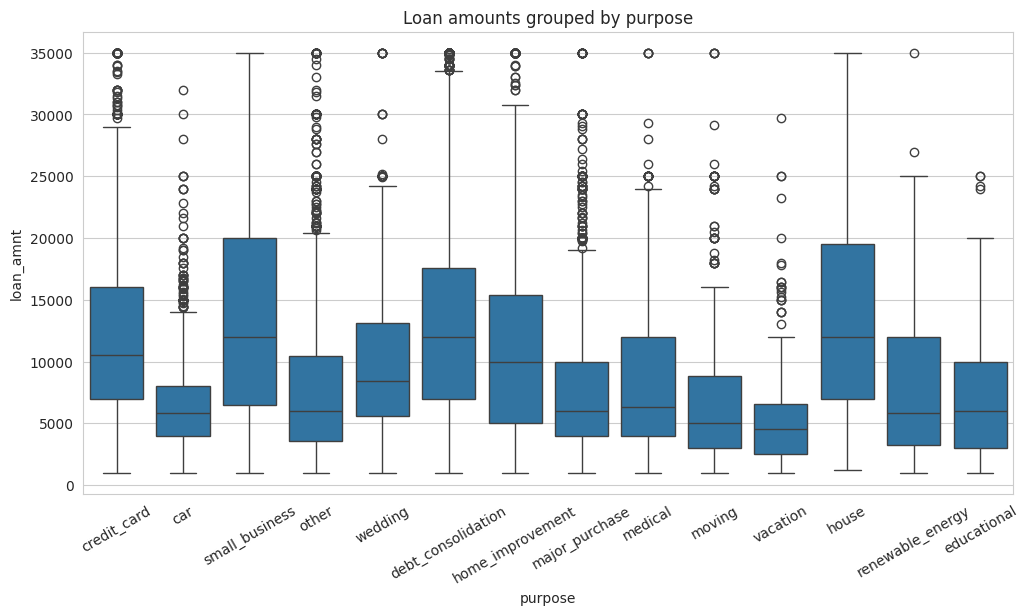

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_loan)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

**Analysis :**

There are 5 highest categories for the amount of credit with the following purposes: Credit card, MSME business, debt consolidation, home improvement, and buying a house

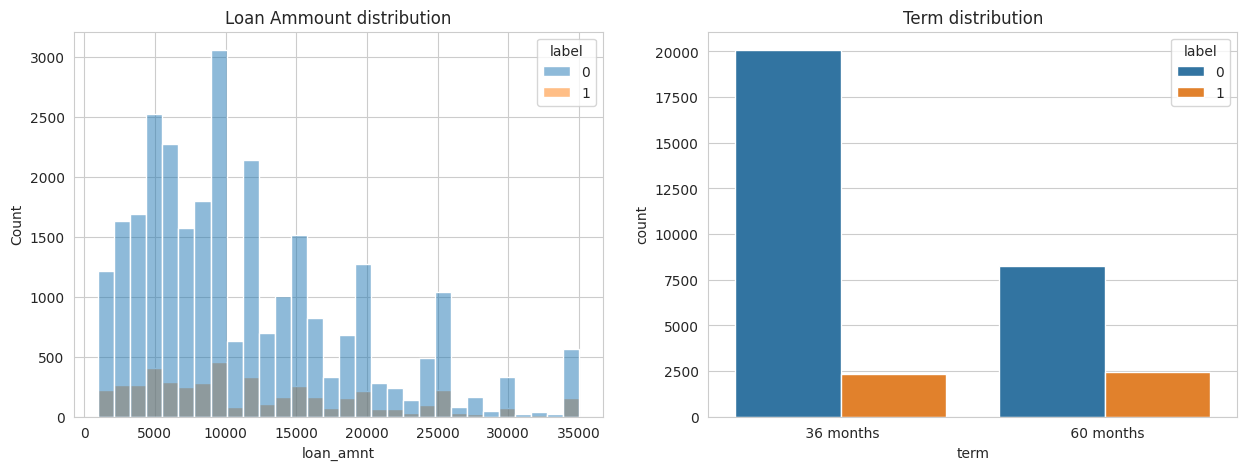

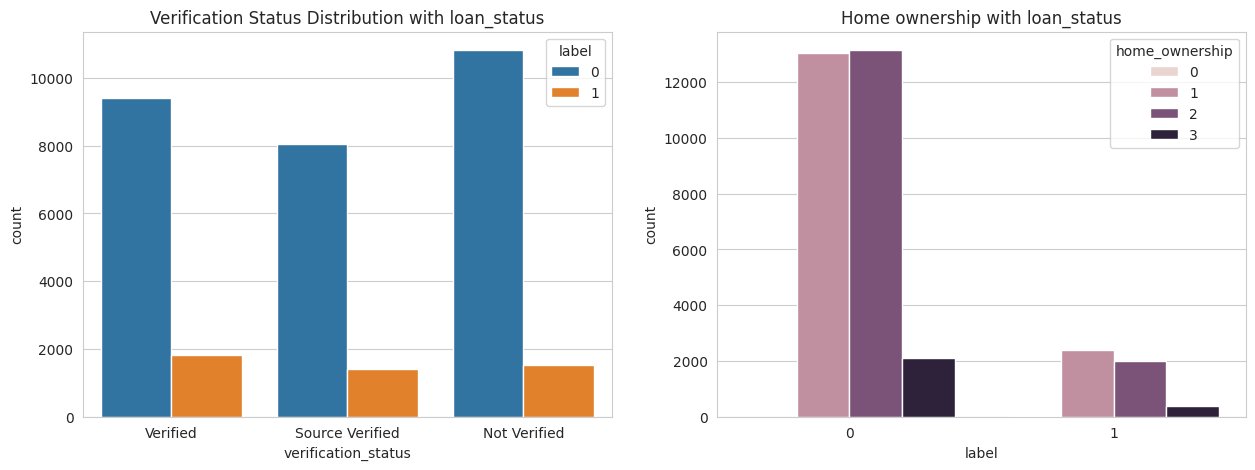

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_loan, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df_loan, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_loan, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df_loan, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

Analysis :
The nominal value of the largest debt is 10000 USD
The maximum maturity is 36 months, while for 60 months it is almost a third
Most of the credits that can be paid in full are obtained from the "Verified" verification status

1.  The nominal value of the largest debt is 10000 USD

2.  The maximum maturity is 36 months, while for 60 months it is almost a third
3. Most of the credits that can be paid in full are obtained from the "Verified" verification status.


**Let us see the correlation between variables:**

In [24]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the dataframe to avoid modifying the original one
df_encoded = df_loan.copy()

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()

# Assuming 'grade' and 'purpose' are the categorical columns
df_encoded['grade'] = label_encoder.fit_transform(df_encoded['grade'])
df_encoded['purpose'] = label_encoder.fit_transform(df_encoded['purpose'])

# Calculate the correlation matrix
corr = df_encoded[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose', 'label']].corr()

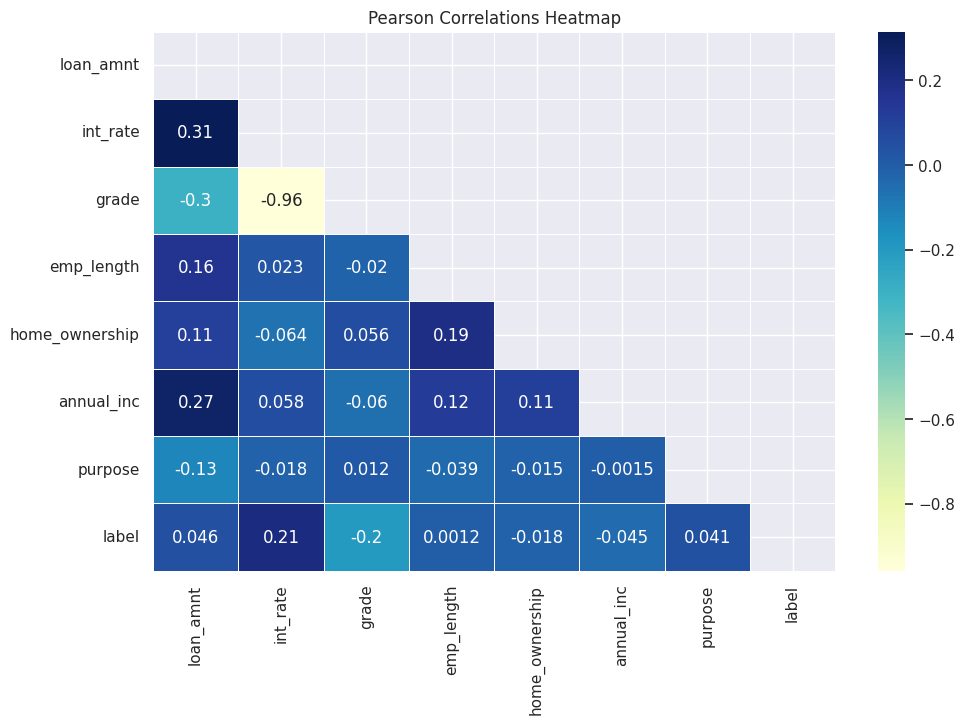

In [25]:
sns.set(rc={'figure.figsize':(11, 7)})
mask = np.triu(np.ones_like(corr, dtype=bool))  # Upper triangle mask
sns.heatmap(corr, linewidths=.5, annot=True, cmap="YlGnBu", mask=mask)\
    .set_title("Pearson Correlations Heatmap")
plt.show()

**Analysis :

**The amount of credit is very dependent on the annual income of the borrower**

## **5. Pre-Processing data for Discrete Coloumn**

In [30]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df_loan[col])
    df_loan[col] = le.transform(df_loan[col])
df_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,label
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,1,0
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,0,1
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,11,0
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,9,0
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,9,0


In [31]:
df_loan.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
label                  0
dtype: int64

In [32]:
df_loan.label = df_loan.label.fillna(1)

## **CLUSTERING DATA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

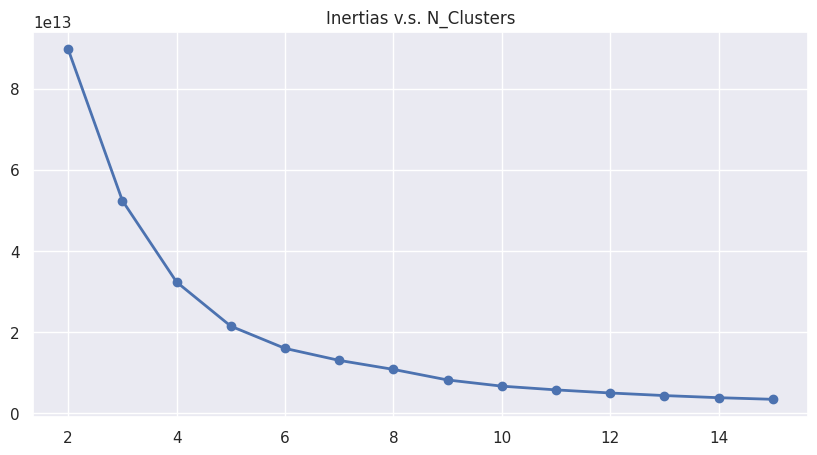

In [33]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_loan)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

**Analysis:**

**"Elbow" on the chart above is at 4. The number of clusters must be 4.**

In [34]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(df_loan)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<ipython-input-35-d611c00a7f93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustered["Cluster"] = clusters


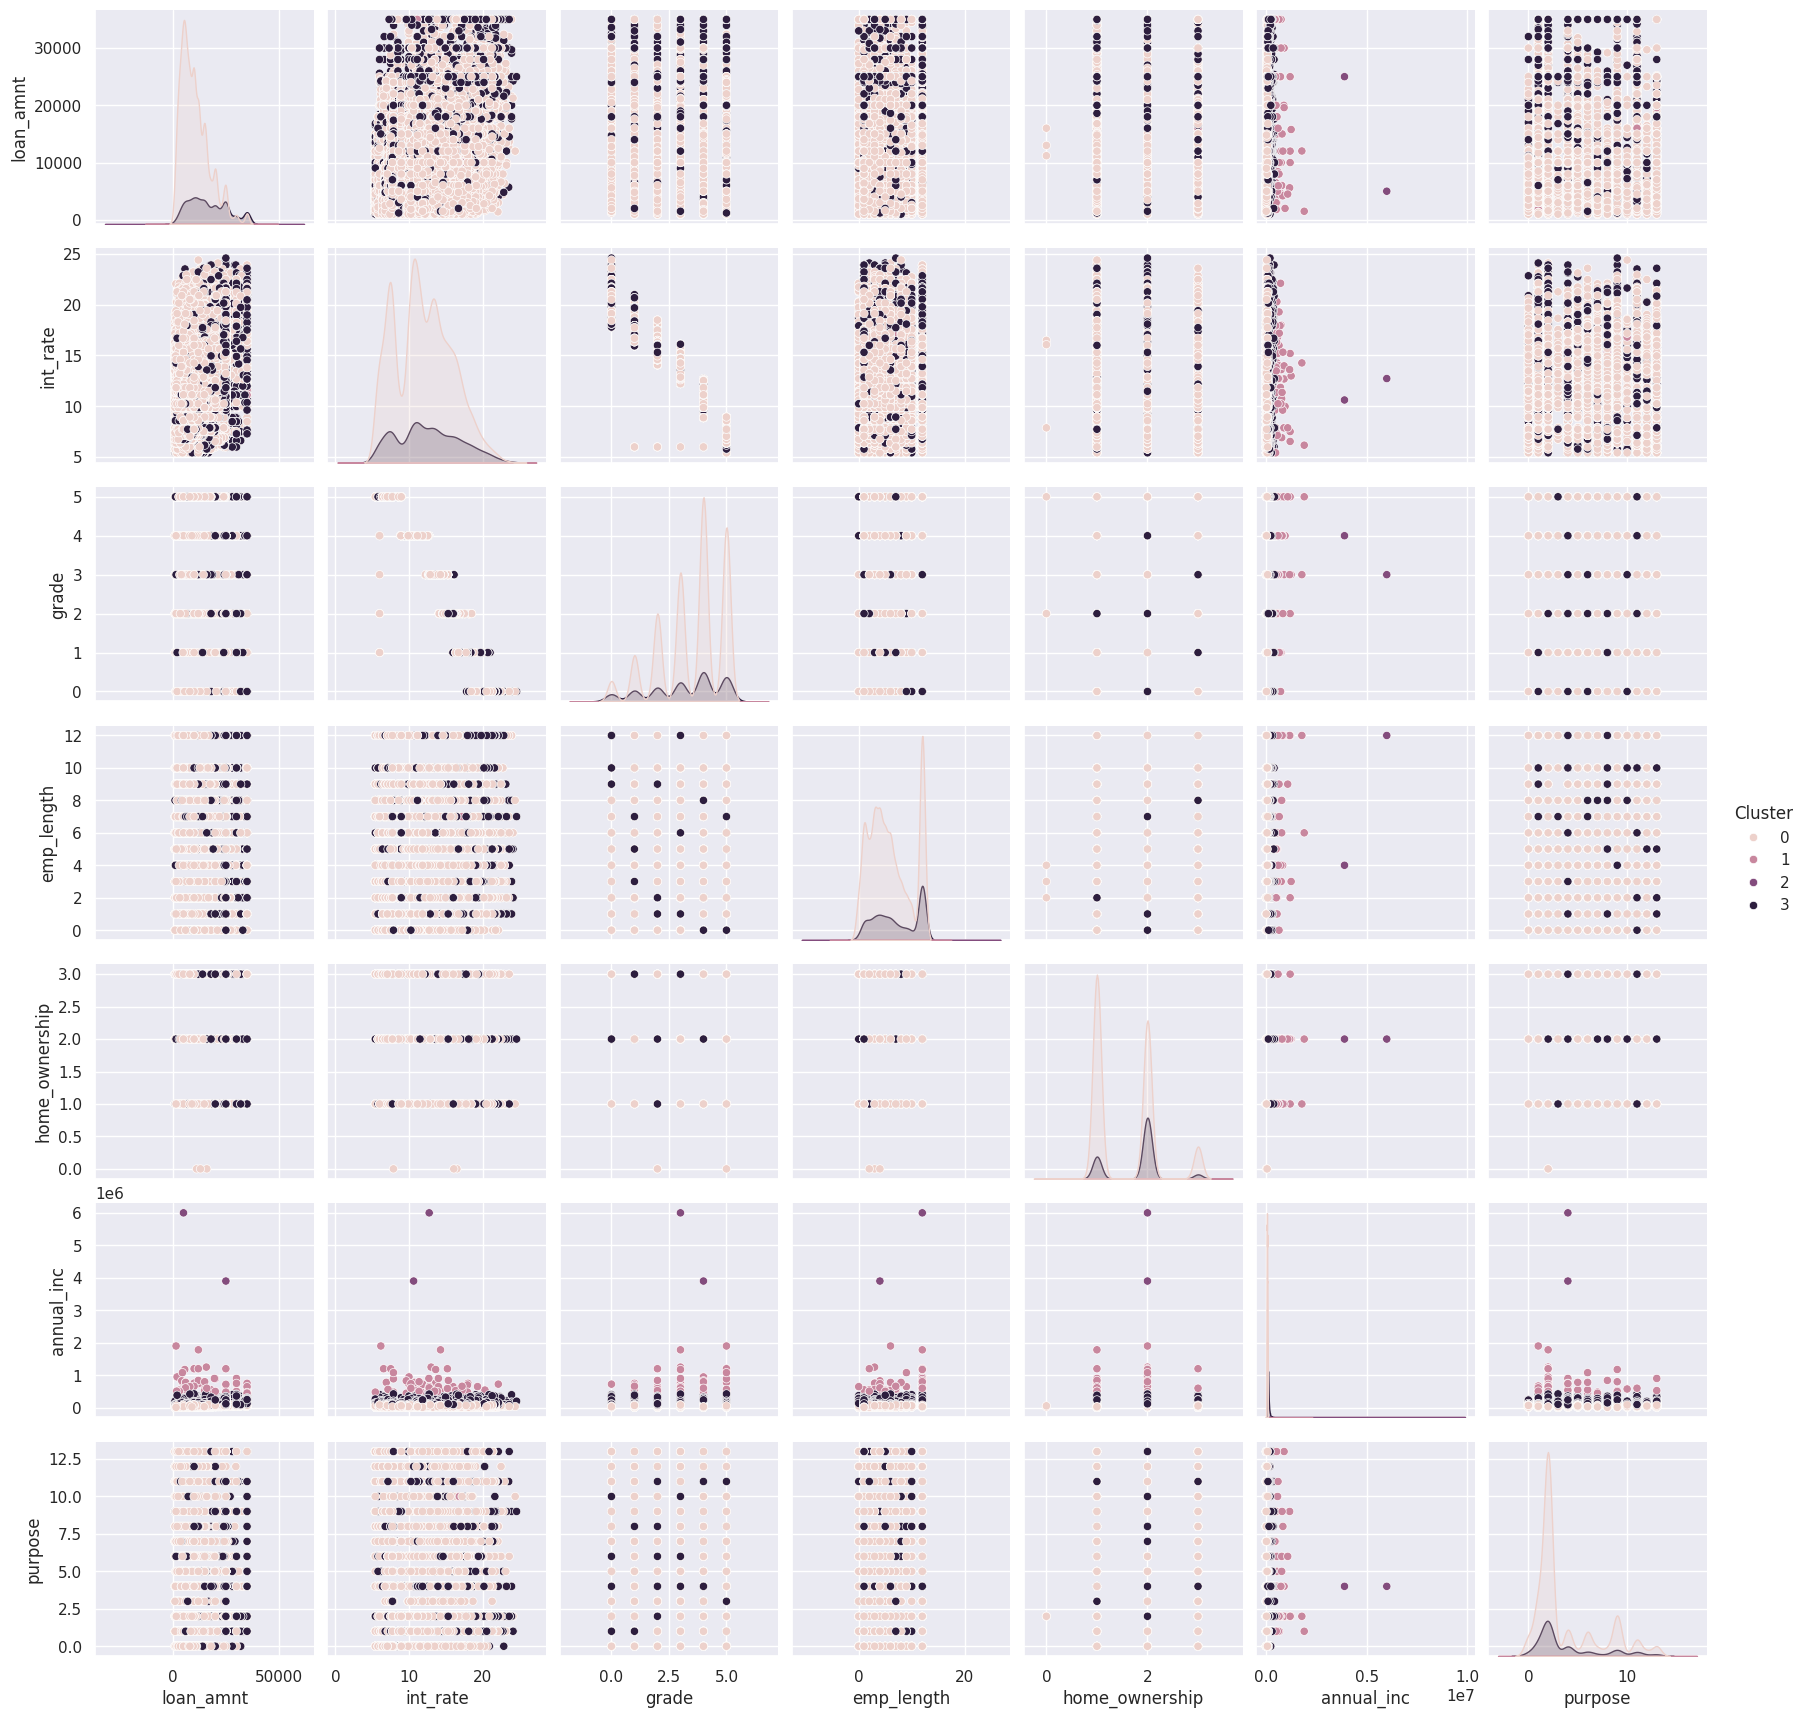

In [35]:
df_clustered = df_loan[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

7**. Predicting Risk:**
# Using the K-Nearest Neighbors Classification Model

In [36]:
X, y = df_loan.drop("label", axis=1), df_loan["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [37]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [38]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

If we use K-Nearest Neighbors Classification, then the value of K is 22  to get the best prediction, then the average accuracy is  0.8522435413204411


Classification with other ML models

add Codeadd Markdown
Since the KNN (K-Nearest Neighbors) Classification takes a lot of time and memory to predict, it is possible to use other ML models such as SVC, DecisionTree, RandomForest, and GaussianNaiveBayes.

However, in this notebook, We use KNN Model Only, and it is done and has got a good accuracy = 91.4%